## US Accidents Data Analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('US_Accidents_Dec21_updated.csv')

In [4]:
## This dataset doesnt contain data of new york

In [5]:
data.shape

(2845342, 47)

In [6]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

#### fetching the numerical columns 

In [7]:
list(data.select_dtypes('number'))

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

#### finding the percent of missing values in each column by visualizing it

In [8]:
missing=data.isna().sum().sort_values(ascending=False)

<AxesSubplot:>

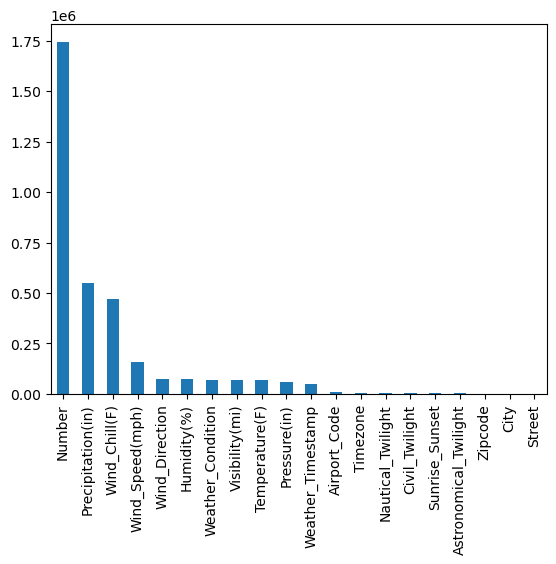

In [9]:
missing[missing > 0].plot(kind='bar')

#### top 5 cities with most no. of accidents

In [11]:
cities_by_accident= data.City.value_counts()

In [14]:
cities_by_accident.sort_values(ascending=False).head()

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Name: City, dtype: int64

#### dropping the number column sice it has most no. of missing values

In [121]:
data.drop(['Number'] , axis= 1)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


#### visualizing cities with most no. of accidents

In [122]:
ct_by_accdnt=data.value_counts('City').sort_values(ascending=False).head(20)

<AxesSubplot:xlabel='City'>

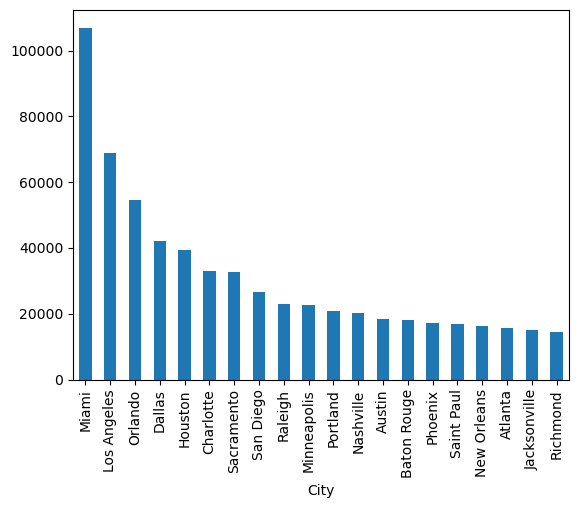

In [123]:
ct_by_accdnt.plot(kind='bar')

#### from the below chart we can see that few cities accidents is very low.
#### we can assume that either accidents are not being reported or data is missing

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='City', ylabel='Count'>

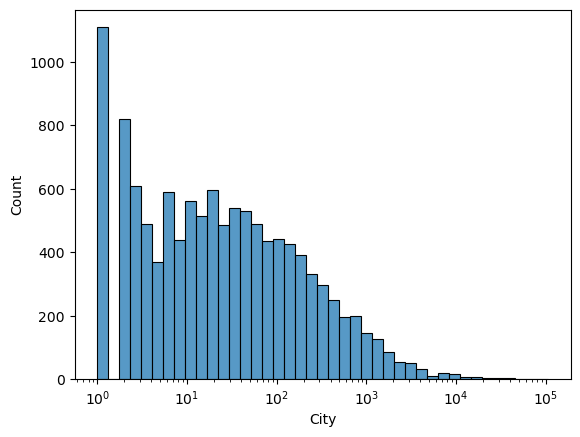

In [27]:
sns.histplot(cities_by_accident,log_scale=True)

#### visualizing the peak hours of accidents
#### we can see that during 1pm to 5pm most number of accidents are reported

In [28]:
data.Start_Time=pd.to_datetime(data.Start_Time)

C:\Users\WINDOWS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

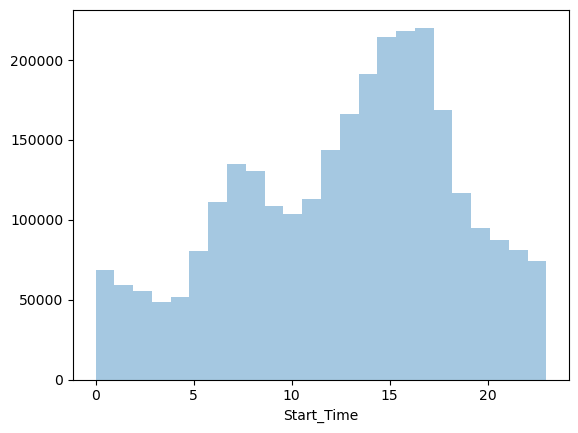

In [29]:
sns.distplot(data.Start_Time.dt.hour , bins=24 , kde=False)

#### visualizing no. accidents per week days  

#### we can see that its evenly distributed from monday to friday and there is fall during the weekends 

In [126]:
data.Start_Time=pd.to_datetime(data.Start_Time)

C:\Users\WINDOWS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

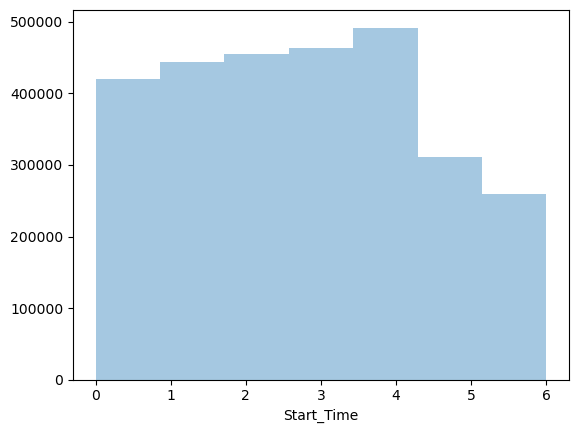

In [127]:
sns.distplot(data.Start_Time.dt.dayofweek , bins=7 ,kde=False )

#### similarly visualizing the accidents reported per month
#### and we can see that during november  and december most no. of accidents are reported

In [36]:
Months=data.Start_Time[data.Start_Time.dt.dayofweek==6]

In [37]:
type(Months)

pandas.core.series.Series

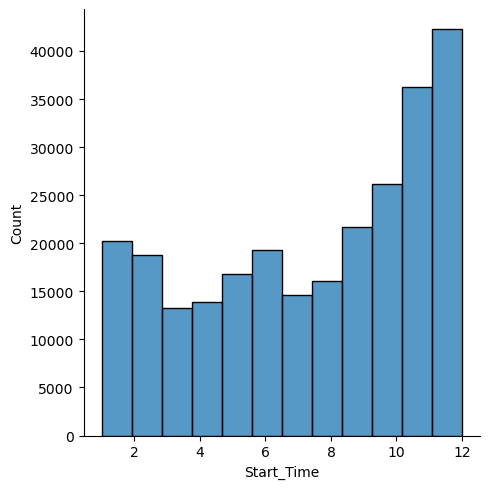

In [38]:
sns.displot(Months.dt.month, bins=12,kde=False )

#### Tried to plot the accident prone zones of america by the cordinates of latitide and longitude values
#### and we are having a rough idea that most accidents are reported along the cost lines


<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

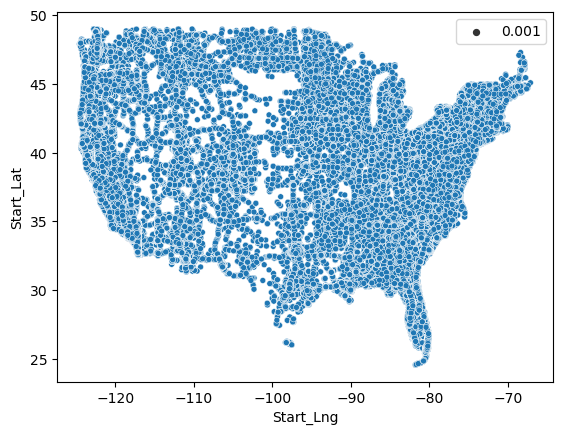

In [151]:
sns.scatterplot(x=data.Start_Lng , y=data.Start_Lat ,size=0.001)